# Assignment

For this assignment, we will familiarize ourselves more with training neural networks using `keras`. As our dataset, we use the **fashion MNIST** data. This is a data set of pictures of clothes and the goal is to label the clothes using one of 10 labels. You can read more about the data [here](https://keras.io/api/datasets/fashion_mnist/#load_data-function).

Let's begin by loading the data.

In [1]:
#we import the libraries and split the data to traing and testing set.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

data = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = data.load_data()

- Show 5 examples of images for each label in the data. Your plot should show a grid of images similar to the ones we created in the lecture, with 10 rows and 5 columns (so 50 images altogether). <span style="color:red" float:right>[5 point]</span>

In [2]:
#we defined labels for each category
label=[0,1,2,3,4,5,6,7,8,9]

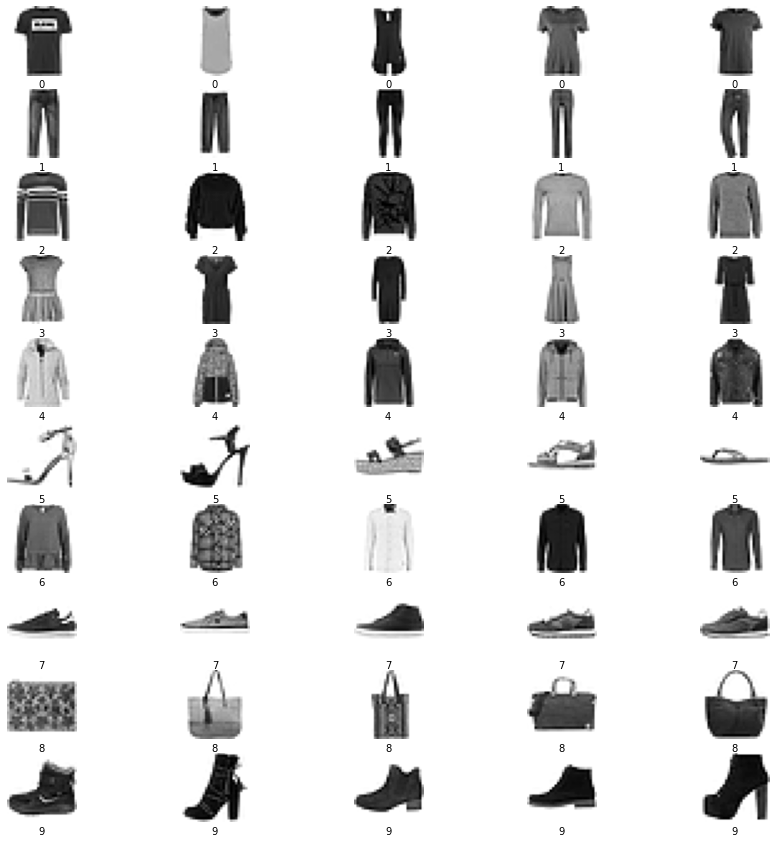

In [3]:
#for showing the images,we first wrote a for loop over labesl which moves on the training data and then for showing them a matrix,
#We wrote another for loop in the for loop to show them as matrix
#the results is showing each category in a seperate row.

from PIL import Image

plt.figure(figsize = (15, 15))
index=1

for i in label:        
    selected_x_train = x_train[y_train == i][:5]    


    for j in range(5):    

        plt.subplot(10, 5, index)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        plt.imshow(selected_x_train[j], cmap = plt.cm.binary)       
        plt.xlabel(i)
        plt.gca().set_frame_on(False)
        
        index=index+1
        

plt.show() 

- Report the number of images we have in the training and test data, and the size of each image. <span style="color:red" float:right>[2 point]</span>

In [4]:
#we reported the numbers of images in training and testing set.
print("Training data dimensions: {}".format(x_train.shape))
print("Test data dimensions: {}".format(x_test.shape))

Training data dimensions: (60000, 28, 28)
Test data dimensions: (10000, 28, 28)


- Using `keras`, train a logistic regression classifier to predict the label of the image. Your model should first flatten each image first. As you can see from the cell below, the code is partly written, so you only need to finish it. You can also check out the [keras documentation](https://www.tensorflow.org/guide/keras/sequential_model) for more examples. <span style="color:red" float:right>[5 point]</span>

Here we wantes to train our logistic regression using Keras. we used only one layer and one output layer ans a simulation of logistic regression.

In [5]:
## your code goes here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
#we normlized the data
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0


In [7]:
# we defined our model and the input and output  layers
model_fashion = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

2023-06-08 03:02:16.676984: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model_fashion.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
#we trained the model
model_fashion.fit(x_train, y_train, epochs = 50)

2023-06-08 03:02:23.083927: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-06-08 03:02:23.085096: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200160000 Hz


Epoch 1/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8004 - accuracy: 0.7239
Epoch 2/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4706 - accuracy: 0.8384
Epoch 3/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4364 - accuracy: 0.8492
Epoch 4/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4252 - accuracy: 0.8553
Epoch 5/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4114 - accuracy: 0.8577
Epoch 6/50
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4056 - accuracy: 0.8582
Epoch 7/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4036 - accuracy: 0.8604
Epoch 8/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3876 - accuracy: 0.8637
Epoch 9/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3915 - accuracy: 0.8617
Epoch 10/50
1875/1875 [==============================] - 3s 1ms/step - loss: 0.394

In [11]:
test_loss, test_acc = model_fashion.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 942us/step - loss: 0.4553 - accuracy: 0.8430
Test accuracy: 0.8429999947547913


- Report the number of parameters, the accuracy of the model on the training data in epoch 1, and the accuracy of the model in the final epoch, and the accuracy of the final model on the test data. Does the model seem to be overfitting? <span style="color:red" float:right>[5 point]</span>

The accuracy of the model in first epoch is 0.72 and in the final epoch is 0.87
The accuracy of the testing data is 0.84.
Based on the comparison, we can see that we are having an overfitted model.

- Using a 10x10 grid of images, show 100 examples of images in the test data for which the model's prediction was correct. <span style="color:red" float:right>[5 point]</span>

In [12]:
predictions_fashion = model_fashion.predict(x_test)

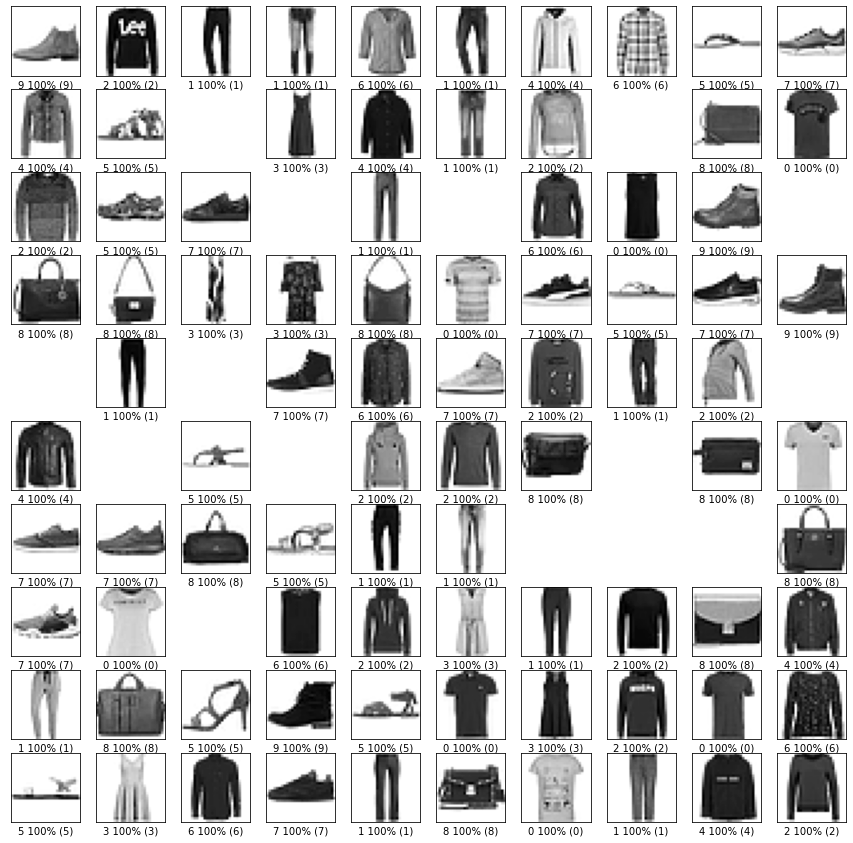

In [13]:
## your code goes here
plt.figure(figsize = (15, 15))
#here we chose those images that have been predicted correctly.
for i in range(10*10):
    if (np.argmax(predictions_fashion[i])==y_test[i]) :
        plt.subplot(10, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap = plt.cm.binary)
        plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions_fashion[i]), 100 * np.max(predictions_fashion), y_test[i]))
plt.show()


- Using a 10x10 grid of images, show 100 examples of images in the test data for which the model's prediction was NOT correct. <span style="color:red" float:right>[5 point]</span>

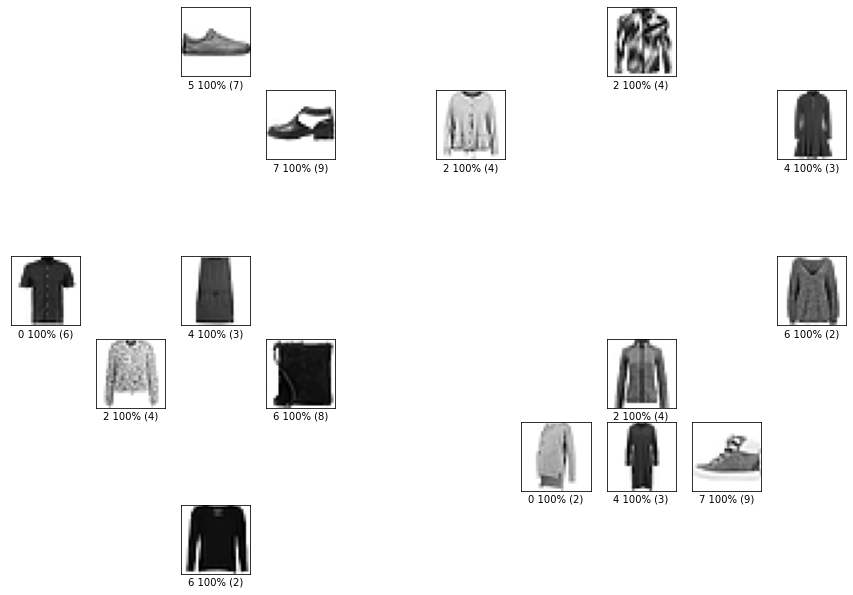

In [14]:
## your code goes here
plt.figure(figsize = (15, 15))
#here we chose those images that have not been predicted correctly.

for i in range(10*10):
    if (np.argmax(predictions_fashion[i])!=y_test[i]) :
        plt.subplot(10, 10, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_test[i], cmap = plt.cm.binary)
        plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions_fashion[i]), 100 * np.max(predictions_fashion), y_test[i]))
plt.show()

- What conclusion can you draw about the classifier? <span style="color:red" float:right>[5 point]</span>

- Train a new neural network model after making the following two changes. Then report the new model's accuracy? <span style="color:red" float:right>[5 point]</span>

  1. Modify your neural network by adding a hidden layer with 5 neurons followed by a dropout layer that drop 25 percent of neurons (dropout isn't really a layer, but the way it's implemented by `keras` makes it seem like a layer). Now retrain the network and report if the new model has improved accuracy.
  1. Instead of training the network for only 50 epochs, train it for 500 epochs this time. To help speed up training, choose a larger number for `batch_size`, like 1200. Note that in practice, the larger the `batch_size` the more mileage we get out of the array or tensor computations, but for large networks with millions of parameters, we eventually hit a limit because the resulting array exceeds available memory.

we trained a model with one hidden layer and a layer for droping 25% of neurons to avoid overfitting.

In [15]:
## your code goes here
model_fashion_new = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(5, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.25, noise_shape=None, seed=None),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [16]:
model_fashion_new.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
model_fashion_new.fit(x_train, y_train, epochs = 500, batch_size=1200)

Epoch 1/500
50/50 [==============================] - 0s 3ms/step - loss: 2.1817 - accuracy: 0.1737
Epoch 2/500
50/50 [==============================] - 0s 3ms/step - loss: 1.8473 - accuracy: 0.2951
Epoch 3/500
50/50 [==============================] - 0s 3ms/step - loss: 1.6788 - accuracy: 0.3767
Epoch 4/500
50/50 [==============================] - 0s 3ms/step - loss: 1.5803 - accuracy: 0.3895
Epoch 5/500
50/50 [==============================] - 0s 3ms/step - loss: 1.5158 - accuracy: 0.4518
Epoch 6/500
50/50 [==============================] - 0s 3ms/step - loss: 1.4638 - accuracy: 0.4720
Epoch 7/500
50/50 [==============================] - 0s 3ms/step - loss: 1.4090 - accuracy: 0.4870
Epoch 8/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3871 - accuracy: 0.4899
Epoch 9/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3538 - accuracy: 0.4949
Epoch 10/500
50/50 [==============================] - 0s 3ms/step - loss: 1.3287 - accuracy: 0.4952
Epoch 11/

In [18]:
predictions_fashion = model_fashion_new.predict(x_test)

In [19]:
test_loss, test_acc = model_fashion_new.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.7509 - accuracy: 0.7705
Test accuracy: 0.7705000042915344


#### As we can see the accuracy is not improving even we add one hidden layer.we can conclude that deep learning is a good method but requires working on finding better parameters for having better model.

As the above assignment should have convinced you, simply choosing a larger or deeper neural network doesn't necessarily result in a better model. Deep learning researchers spend a lot of time finding ways to allow a neural network to "go deeper" while keeping the number of parameters in check to avoid easily overfitting. We learn in the next lesson two such architectures.

# End of assignment